# Compressor de Imagens

Alunos: 
 - Daniel Souza de Campos - 2018054664
 - Letícia da Silva Macedo Alves - 2018054443

In [3]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import statistics

In [29]:
# image entropy
def calcEntropy(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist.ravel()/hist.sum()
    logs = np.log2(hist+0.00001)
    entropy = -1 * (hist*logs).sum()

    return entropy

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


def psnr(predictions, targets):
    rmsev = rmse(predictions, targets)
    return 20 * np.log10(255/rmsev)

def mostraInformacoesCompressao(imgReal, imgComprimida):
    print(f"RMSE: {rmse(imgReal, imgComprimida)}")
    print(f"PSNR: {psnr(imgReal, imgComprimida)}")

In [189]:
def retira3BitsMenosSignificativos(img):
    #retira 3 bits
    return img & 0xF8


In [167]:
def calculaComprimentosCorrida (img):
    comprimentosCorrida = []
    
    tomAtual = -1
    qtdRepeticoes = 0
    
    for x in range(img.shape[0]):
        for y in range (img.shape[1]):
            if (tomAtual < 0):
                tomAtual = img[x][y]
                qtdRepeticoes += 1
            else:
                if (img[x][y] == tomAtual):
                    qtdRepeticoes += 1
                else:
                    comprimentosCorrida.append((tomAtual, qtdRepeticoes))
                    tomAtual = img[x][y]
                    qtdRepeticoes = 1
                        
    comprimentosCorrida.append((tomAtual, qtdRepeticoes))
    return comprimentosCorrida

In [168]:
def calculaComprimentosCorrida2 (img):
    comprimentosCorrida = []
    
    tomAtual = -1
    tomAnterior = -1
    
    qtdRepeticoes = 0
    
    MIN_REPETICOES = 2
    MAX_DIFERENCA = 5
    
    tonsContados = []
    for x in range(img.shape[0]):
        for y in range (img.shape[1]):
            #print(len(tonsContados))
            if (tomAtual < 0):
                tomAtual = img[x][y]
                tonsContados.append(int(img[x][y]))
                qtdRepeticoes += 1
            else:
                if (img[x][y] == tomAtual or img[x][y] == tomAnterior):
                    tonsContados.append(int(img[x][y]))
                    qtdRepeticoes += 1
                else:
                    if (qtdRepeticoes >= MIN_REPETICOES or abs(int(tomAtual)-int(img[x][y])) > MAX_DIFERENCA):
                        if(len(tonsContados)==0):
                            tomAGuardar = img[x][y]
                        else:
                            #tomAGuardar = statistics.median(tonsContados)
                            tomAGuardar = int(statistics.mean(tonsContados))
                        #comprimentosCorrida.append((tomAtual, qtdRepeticoes))
                        comprimentosCorrida.append((tomAGuardar, qtdRepeticoes))
                        tomAtual = img[x][y]
                        
                        tomAnterior = -1
                        tonsContados.clear()
                        qtdRepeticoes = 1
                    else:
                        #tomAtual = math.ceil((int(tomAtual) + int(img[x][y]))/2)
                        tonsContados.append(int(tomAnterior))
                        tomAnterior = img[x][y]
                        
                        qtdRepeticoes += 1
                        
    comprimentosCorrida.append((tomAGuardar, qtdRepeticoes))
    return comprimentosCorrida

In [169]:
def calculaComprimentosCorrida3 (img):
    comprimentosCorrida = []
    
    tomAtual = -1
    tomAnterior = -1
    
    qtdRepeticoes = 0
    
    MAX_DIFERENCA = 30
    
    tonsContados = []
    for x in range(img.shape[0]):
        for y in range (img.shape[1]):
            #print(len(tonsContados))
            if (tomAtual < 0):
                tomAtual = img[x][y]
                tonsContados.append(int(img[x][y]))
                qtdRepeticoes += 1
            else:
                if (img[x][y] == tomAtual or img[x][y] == tomAnterior):
                    tonsContados.append(int(img[x][y]))
                    qtdRepeticoes += 1
                else:
                    if (abs(int(tomAtual)-int(img[x][y])) > MAX_DIFERENCA):
                        if(len(tonsContados)==0):
                            tomAGuardar = img[x][y]
                        else:
                            #tomAGuardar = int(statistics.median(tonsContados))
                            tomAGuardar = int(statistics.mean(tonsContados))
                        #comprimentosCorrida.append((tomAtual, qtdRepeticoes))
                        comprimentosCorrida.append((tomAGuardar, qtdRepeticoes))
                        tomAtual = int(img[x][y])
                        
                        tomAnterior = -1
                        tonsContados.clear()
                        qtdRepeticoes = 1
                    else:
                        #tomAtual = math.ceil((int(tomAtual) + int(img[x][y]))/2)
                        tonsContados.append(int(tomAnterior))
                        tomAnterior = img[x][y]
                        
                        qtdRepeticoes += 1
                        
    comprimentosCorrida.append((tomAGuardar, qtdRepeticoes))
    return comprimentosCorrida

In [170]:
def geraImagemComprimentosCorrida(largura, altura, comprimentosCorrida):
    imagemVetorizada = np.zeros(largura*altura, dtype=np.int16)
    indexInicio = 0
    indexFim = 0
    
    for (x,y) in comprimentosCorrida:
        indexFim += y 
        imagemVetorizada[indexInicio:indexFim] = int(x)
        indexInicio = indexFim
    
    imagemReconstruida = np.reshape(imagemVetorizada, (largura,altura))
    
    return imagemReconstruida

In [262]:
def comprimeImagem(img):
    imgPsicovisual = retira3BitsMenosSignificativos(img)
    imgInterpixel = calculaComprimentosCorrida(imgPsicovisual)
    return imgInterpixel

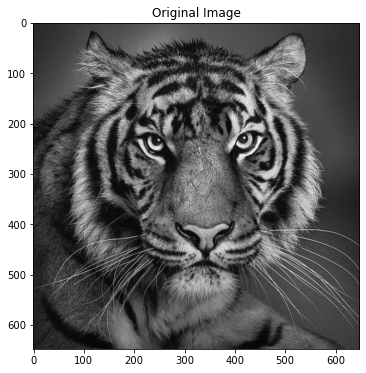

In [263]:
# original
tigre = cv2.imread('tigre.jpg',0)
plt.figure(figsize=(12,6))
plt.title('Original Image')
plt.imshow(tigre, cmap = 'gray')
plt.show()

In [264]:
print(f"Entropia :{calcEntropy(tigre)}")

Entropia :7.425243377685547


In [265]:
testeTigre = comprimeImagem(tigre)

In [266]:
max(testeTigre, key=lambda item:item[1])[0]

72

In [267]:
min(testeTigre, key=lambda item:item[0])[0]

0

In [268]:
print(len(testeTigre))

277101


In [269]:
print(tigre.shape[0]*tigre.shape[1])

419904


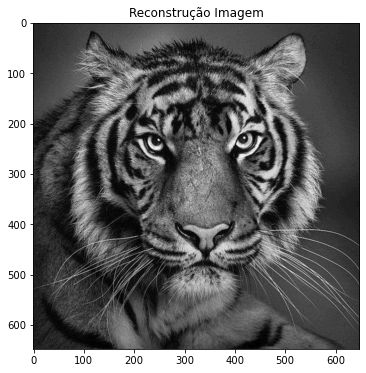

RMSE: 4.181092425958722
PSNR: 35.70500824791146


In [270]:
tigreReconstruido = geraImagemComprimentosCorrida(tigre.shape[0], tigre.shape[1], testeTigre)
plt.figure(figsize=(12,6))
plt.title('Reconstrução Imagem')
plt.imshow(tigreReconstruido, cmap = 'gray')
plt.show()
mostraInformacoesCompressao(tigre, tigreReconstruido)

In [271]:
np.min(tigreReconstruido)

0

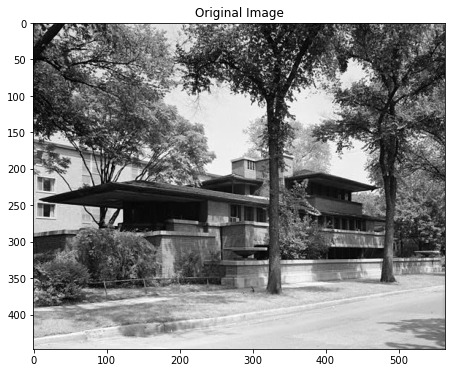

In [272]:
# original
casa = cv2.imread('casa.jpg',0)
plt.figure(figsize=(12,6))
plt.title('Original Image')
plt.imshow(casa, cmap = 'gray')
plt.show()

In [273]:
testeCasa = comprimeImagem(casa)

In [274]:
print(casa.shape[0]*casa.shape[1])
print(len(testeCasa))

252108
177730


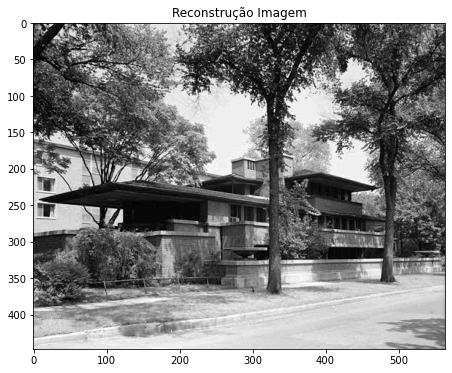

In [275]:
casaReconstruida = geraImagemComprimentosCorrida(casa.shape[0], casa.shape[1], testeCasa)
plt.figure(figsize=(12,6))
plt.title('Reconstrução Imagem')
plt.imshow(casaReconstruida, cmap = 'gray')
plt.show()

In [276]:
mostraInformacoesCompressao(casa, casaReconstruida)

RMSE: 4.184219299730603
PSNR: 35.69851484213048


In [277]:
casaReconstruida2 = comprimeImagem(casaReconstruida)

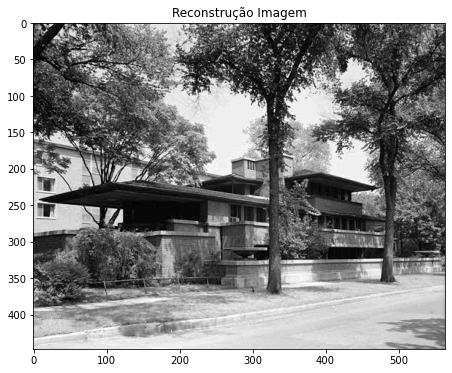

In [278]:
casaReconstruida22 = geraImagemComprimentosCorrida(casa.shape[0], casa.shape[1], casaReconstruida2)
plt.figure(figsize=(12,6))
plt.title('Reconstrução Imagem')
plt.imshow(casaReconstruida22, cmap = 'gray')
plt.show()

In [279]:
mostraInformacoesCompressao(casa, casaReconstruida22)

RMSE: 4.184219299730603
PSNR: 35.69851484213048
